In [1]:
! gdown 14DoImQQ3OHZKgqmKwtBO8qysiZ3lTc1T           #M&M
! gdown 1D0Eoe3K-SYzCgfUbWcdQ8pEQrmaa2V4m           #MARUTI
! gdown 1dTlMRsU9sYXgjXCiPyZCeYR9kd0jNLRH           #TATAMOTORS
! gdown 16tUwjm5K5JRnnpA7B57iZ50r-h1bgkrr           #HEROMOTOCO
! gdown 1UExvGxQjnAI3MdDNMrMW6WoDfETZEWqu           #FORCEMOT

Downloading...
From: https://drive.google.com/uc?id=14DoImQQ3OHZKgqmKwtBO8qysiZ3lTc1T
To: /content/20-04-2022-TO-20-04-2023-M&M-EQ-N.csv
100% 26.0k/26.0k [00:00<00:00, 54.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D0Eoe3K-SYzCgfUbWcdQ8pEQrmaa2V4m
To: /content/20-04-2022-TO-20-04-2023-MARUTI-EQ-N.csv
100% 26.7k/26.7k [00:00<00:00, 62.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dTlMRsU9sYXgjXCiPyZCeYR9kd0jNLRH
To: /content/20-04-2022-TO-20-04-2023-TATAMOTORS-EQ-N.csv
100% 26.7k/26.7k [00:00<00:00, 73.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=16tUwjm5K5JRnnpA7B57iZ50r-h1bgkrr
To: /content/20-04-2022-TO-20-04-2023-HEROMOTOCO-EQ-N.csv
100% 28.1k/28.1k [00:00<00:00, 72.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UExvGxQjnAI3MdDNMrMW6WoDfETZEWqu
To: /content/20-04-2022-TO-20-04-2023-FORCEMOT-EQ-N.csv
100% 26.5k/26.5k [00:00<00:00, 68.8MB/s]


In [2]:
import math
import random
import datetime 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler

import keras 
import tensorflow as tf
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM

seed_value = 6
np.random.seed(seed_value)
random.seed(seed_value)
keras.backend.clear_session()
tf.random.set_seed(seed_value)

In [3]:
df1=pd.read_csv('20-04-2022-TO-20-04-2023-M&M-EQ-N.csv')
df2=pd.read_csv('20-04-2022-TO-20-04-2023-MARUTI-EQ-N.csv')
df3=pd.read_csv('20-04-2022-TO-20-04-2023-TATAMOTORS-EQ-N.csv')
df4=pd.read_csv('20-04-2022-TO-20-04-2023-HEROMOTOCO-EQ-N.csv')
df5=pd.read_csv('20-04-2022-TO-20-04-2023-FORCEMOT-EQ-N.csv')

In [4]:
df_list=[df1,df2,df3,df4,df5]
data=[None]*len(df_list)            #Creating lists with size the same as that of df_list
dataset=[None]*len(df_list)
scaled_data=[None]*len(df_list)
training_data_len=[None]*len(df_list)
train_data=[None]*len(df_list)
test_data=[None]*len(df_list)
x_train=[]
y_train=[]
x_test=[]
y_test=[]
predictions=[]

#Create a list of empty lists
num_lists = len(df_list)

# Create empty lists using a for loop
for _ in range(num_lists):
    empty_list = []
    x_train.append(empty_list)
    

for _ in range(num_lists):
    empty_list = []
    y_train.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    x_test.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    y_test.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    predictions.append(empty_list)


Cleaner function

In [5]:
#Function to change the index of dataframe to date
def chng_index(df):
  dt_li=[]
  for i in df.index:
    dt_li.append(datetime.datetime.strptime(df['Date  '][i],'%d-%m-%Y').date())
  
  df.index=dt_li

In [6]:
#Function to plot the data
def plotter(df):
  plt.figure(figsize=(16,8))
  plt.title('Close price history')
  plt.plot(df.index,df['Close Price  '])
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Close price '+df['Symbol  '][1],fontsize=18)
  plt.show()

In [7]:
len(x_train[0])

0

In [8]:
scaled_data[4]

In [9]:
#Function to extract the 'Close Price Column of the dataframes and scale the datasets
def extract(df,i):
  data[i]=df['Close Price  ']
  #convert the data into numpy array 
  dataset[i]=data[i].values
  dataset[i]=dataset[i].reshape(-1,1)
  scaler=MinMaxScaler(feature_range=(0,1))
  scaled_data[i]=scaler.fit_transform(dataset[i])




In [10]:
#Fuction to split the x training dataset 
def split_x_train(var):
  training_data_len[var]=math.ceil(len(dataset[var])*0.8)
  train_data[var]=scaled_data[var][0:training_data_len[var],:]

  #Splitting into x train and y train
  #x train will have the sets data values i.e. the past 60 days data divided into sets of (0,59), (1,60), (2,61) etc.
  #y train will have the target values, for each set the target value is the closing price of the next day, i.e. for x_train (0,59) the target will be the closing price of 60th day. 
  for j in range(60, len(train_data[var])):
    x_train[var].append(train_data[var][j-60:j,0])
    


In [11]:
#Fuction to split the y training dataset 
def split_y_train(var):
  for j in range(60, len(train_data[var])):
    y_train[var].append(train_data[var][j,0])

In [12]:
def convert(i):
  #currently x_train and y_train are simply lists, so we convert them to numpy arrays
  x_train[i], y_train[i]=np.array(x_train[i]), np.array(y_train[i])

In [13]:
def re_shp(i) :
  x_train[i]=np.reshape(x_train[i],(x_train[i].shape[0],x_train[i].shape[1],1))

  #For i=0, this statement is equivalent to np.reshape(x_train,(134,60,1))   134 instances, 60 features
  #LSTMs expect a 3D input

In [14]:
#Fuction to split the x testing dataset 
def split_x_test(i):
  test_data[i]=scaled_data[i][training_data_len[i]-60:,:]
  for j in range(60, len(test_data[i])):
   x_test[i].append(test_data[i][j-60:j,0])


In [15]:
def split_y_test(i):
  y_test[i]=dataset[i][training_data_len[i]:, :]
  

In [16]:
def conv_x_test(i):
#Convert test data set to numpy array
  x_test[i]=np.array(x_test[i])
#Reshape the data
  x_test[i]=np.reshape(x_test[i],(x_test[i].shape[0],x_test[i].shape[1],1))

In [17]:
def scale(i):
  scaler=MinMaxScaler(feature_range=(0,1))
  scaled_data[i]=scaler.fit_transform(dataset[i])
  predictions[i]=scaler.inverse_transform(predictions[i])

In [18]:
def cleaning(listt):
  for i in range (0,5):
    if not(listt[i].isnull().values.any()):
      chng_index(listt[i])
      # # plotter(listt[i])
      extract(listt[i],i)
      split_x_train(i)
      split_y_train(i)
      convert(i)
      re_shp(i)
      split_x_test(i)
      split_y_test(i)
      conv_x_test(i)
      #scale(i)

In [19]:
cleaning(df_list)

In [21]:
model1= load_model('M&M.h5')

In [22]:
predictions[0]=model1.predict(x_test[0])
scale(0)

2/2 [==============================] - 1s 17ms/step


In [23]:
rmse=np.sqrt(np.mean(predictions[0]-y_test[0])**2)
rmse

0.3374715169270767

Building the 2nd model

In [52]:
model2_on_1=keras.models.Sequential(model1.layers[:-1])
model2_on_1.add(Dense(1))

In [53]:
#Freezing the new models layers
for layer in model2_on_1.layers[:-1]:
  layer.trainable = False

optimizer=keras.optimizers.Adam(lr=1e-2)
model2_on_1.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [54]:
model2_on_1.fit(x_train[1], y_train[1], batch_size=1, epochs=20)

Epoch 1/20
140/140 [==============================] - 6s 9ms/step - loss: 0.1111 - accuracy: 0.0071
Epoch 2/20
140/140 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.0071
Epoch 3/20
140/140 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 0.0071
Epoch 4/20
140/140 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.0071
Epoch 5/20
140/140 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0071
Epoch 6/20
140/140 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0071
Epoch 7/20
140/140 [==============================] - 2s 12ms/step - loss: 0.0025 - accuracy: 0.0071
Epoch 8/20
140/140 [==============================] - 2s 14ms/step - loss: 0.0025 - accuracy: 0.0071
Epoch 9/20
140/140 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.0071
Epoch 10/20
140/140 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.0

In [55]:
predictions[1]=model2_on_1.predict(x_test[1])
scale(1)

2/2 [==============================] - 1s 27ms/step


In [56]:
rmse=np.sqrt(np.mean(predictions[1]-y_test[1])**2)
rmse

2.4354950573979295

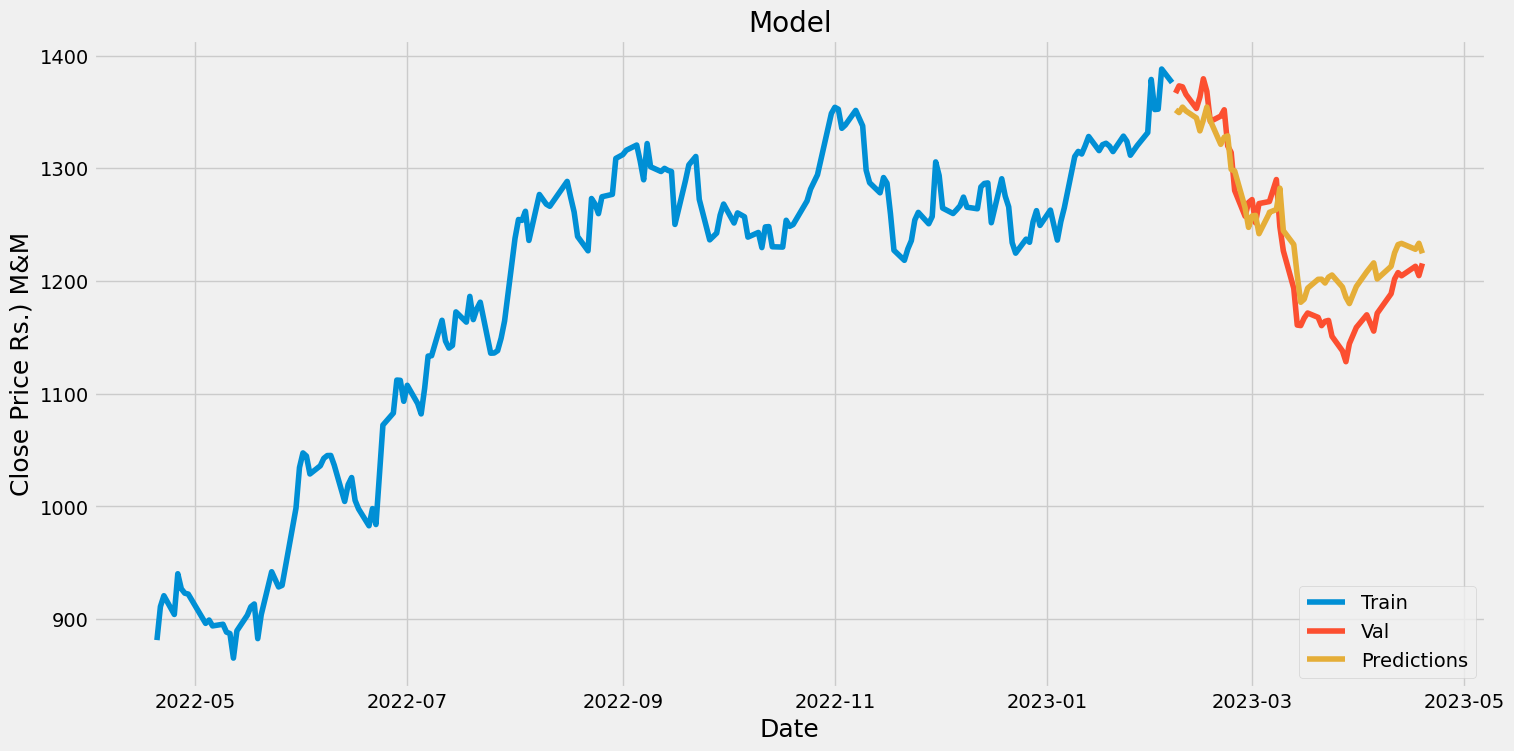

In [25]:
train=data[0][:training_data_len[0]]
valid=data[0][training_data_len[0]:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions[0]
#Visualize
plt.figure(figsize=(16,8))
plt.title('M&M')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
valid

,Close Price,Predictions
2023-02-07,1366.70,1351.703369
2023-02-08,1373.05,1349.359497
2023-02-09,1372.20,1354.182007
2023-02-10,1365.45,1350.793091
2023-02-13,1353.00,1344.586670
2023-02-14,1363.15,1333.125488
2023-02-15,1379.35,1342.834473
2023-02-16,1368.15,1354.272217
2023-02-17,1341.50,1342.162842
2023-02-20,1346.25,1321.171753


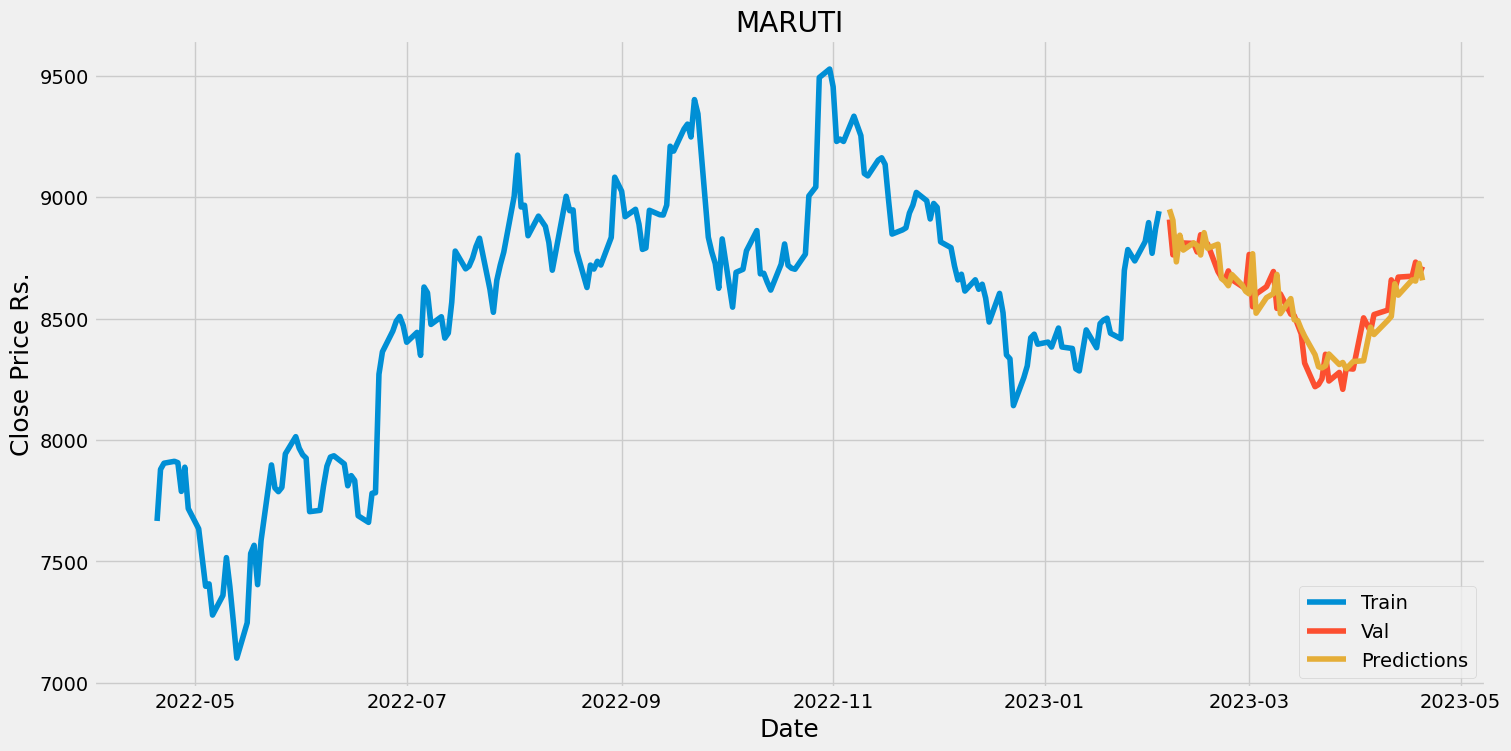

In [59]:
train=data[1][:training_data_len[1]]
valid=data[1][training_data_len[1]:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions[1]
#Visualize
plt.figure(figsize=(16,8))
plt.title('MARUTI')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
valid

,Close Price,Predictions
2023-02-06,8908.00,8949.849609
2023-02-07,8762.45,8905.003906
2023-02-08,8834.70,8733.538086
2023-02-09,8801.20,8843.457031
2023-02-10,8811.35,8782.192383
2023-02-13,8809.45,8811.645508
2023-02-14,8774.45,8800.479492
2023-02-15,8845.35,8761.900391
2023-02-16,8805.10,8853.902344
2023-02-17,8807.75,8789.562500


3rd Model

In [60]:
model3_on_1=keras.models.Sequential(model1.layers[:-1])
model3_on_1.add(Dense(1))